In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from models import residualAttention128
import pandas as pd
from utils import plot_training_hist

In [2]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
y_train_10 = to_categorical(y_train_10, 10)
y_test_10 = to_categorical(y_test_10, 10)
x_train_10, x_vali_10, y_train_10, y_vali_10 = train_test_split(x_train_10, y_train_10, test_size=0.05, random_state=42)

## Residual Attention Network 128 (Attention-128)

In [3]:
model128 = residualAttention128()

In [4]:
model128.count_params()

50868170

In [10]:
lrSchedule = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint("./saved_weights/attention128_weights.hdf5",
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
model128.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = model128.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100,
    verbose=1)

Epoch 1/100
743/742 [==============================] - 327s 441ms/step - loss: 8.2838 - categorical_accuracy: 0.3688 - val_loss: 2.1592 - val_categorical_accuracy: 0.4392
Epoch 2/100
743/742 [==============================] - 328s 442ms/step - loss: 2.0007 - categorical_accuracy: 0.4378 - val_loss: 1.8225 - val_categorical_accuracy: 0.4708
Epoch 3/100
743/742 [==============================] - 319s 429ms/step - loss: 1.6722 - categorical_accuracy: 0.4787 - val_loss: 1.9453 - val_categorical_accuracy: 0.4480
Epoch 4/100
743/742 [==============================] - 327s 440ms/step - loss: 1.5797 - categorical_accuracy: 0.4957 - val_loss: 1.5360 - val_categorical_accuracy: 0.5092
Epoch 5/100
743/742 [==============================] - 319s 429ms/step - loss: 1.5508 - categorical_accuracy: 0.5052 - val_loss: 1.6061 - val_categorical_accuracy: 0.5176
Epoch 6/100
743/742 [==============================] - 326s 439ms/step - loss: 1.4698 - categorical_accuracy: 0.5231 - val_loss: 1.4249 - val_cat

In [11]:
pd.DataFrame(training_hist.history).to_csv("./saved_hists/attention128-cifar10-hist.csv", index = False)
model128.load_weights("./saved_weights/attention128_weights.hdf5")
model128.save("./saved_models/attention128")

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

model128.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=1000))

10/10 [==============================] - 16s 2s/step - loss: 0.3800 - categorical_accuracy: 0.8777


[0.37997591495513916, 0.8776999711990356]

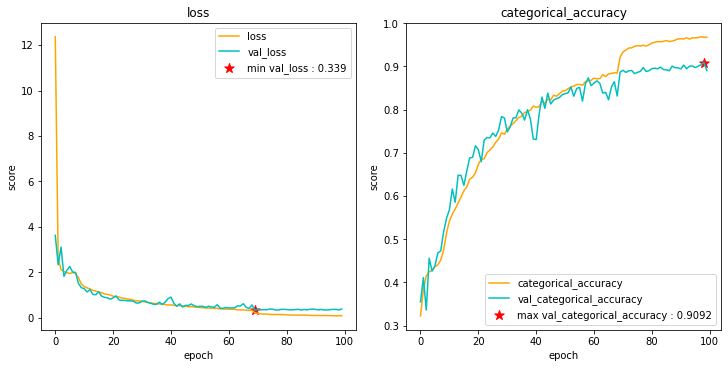

In [2]:
plot_training_hist(pd.read_csv("./saved_hists/attention128-cifar10-hist.csv"))